# **Advanced Multi-Model Classification with Cross-Validation & Hyperparameter Tuning**

A comprehensive ML pipeline comparing multiple algorithms with advanced evaluation metrics.

In [1]:
# --- Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                             roc_curve, auc, precision_recall_curve, f1_score)
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# --- Load and Explore Dataset ---
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print(f"Dataset Shape: {X.shape}")
print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]}")
print(f"\nTarget Distribution:")
print(f"  Malignant (0): {sum(y == 0)}")
print(f"  Benign (1): {sum(y == 1)}")
print(f"\nFeature Names:\n{list(X.columns[:10])}... (and {len(X.columns)-10} more)")

Dataset Shape: (569, 30)
Features: 30
Samples: 569

Target Distribution:
  Malignant (0): 212
  Benign (1): 357

Feature Names:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']... (and 20 more)


In [3]:
# --- Data Preprocessing ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train_scaled.shape[0]} samples")
print(f"Testing set: {X_test_scaled.shape[0]} samples")

Training set: 455 samples
Testing set: 114 samples


In [4]:
# --- Define Models ---
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

print("Models defined:")
for name in models:
    print(f"  - {name}")

Models defined:
  - Logistic Regression
  - Support Vector Machine
  - Random Forest
  - Gradient Boosting
  - K-Nearest Neighbors


In [5]:
# --- Cross-Validation Comparison ---
print("=" * 60)
print("CROSS-VALIDATION RESULTS (5-Fold)")
print("=" * 60)

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_results[name] = scores
    print(f"\n{name}:")
    print(f"  Mean Accuracy: {scores.mean():.4f} (+/- {scores.std()*2:.4f})")
    print(f"  Individual Folds: {[f'{s:.4f}' for s in scores]}")

CROSS-VALIDATION RESULTS (5-Fold)

Logistic Regression:
  Mean Accuracy: 0.9802 (+/- 0.0256)
  Individual Folds: ['0.9670', '0.9780', '0.9670', '1.0000', '0.9890']

Support Vector Machine:
  Mean Accuracy: 0.9714 (+/- 0.0357)
  Individual Folds: ['0.9560', '0.9890', '0.9451', '0.9780', '0.9890']



Random Forest:
  Mean Accuracy: 0.9538 (+/- 0.0469)
  Individual Folds: ['0.9670', '0.9890', '0.9231', '0.9341', '0.9560']



Gradient Boosting:
  Mean Accuracy: 0.9560 (+/- 0.0278)
  Individual Folds: ['0.9670', '0.9670', '0.9341', '0.9451', '0.9670']



K-Nearest Neighbors:
  Mean Accuracy: 0.9670 (+/- 0.0417)
  Individual Folds: ['0.9451', '1.0000', '0.9451', '0.9780', '0.9670']


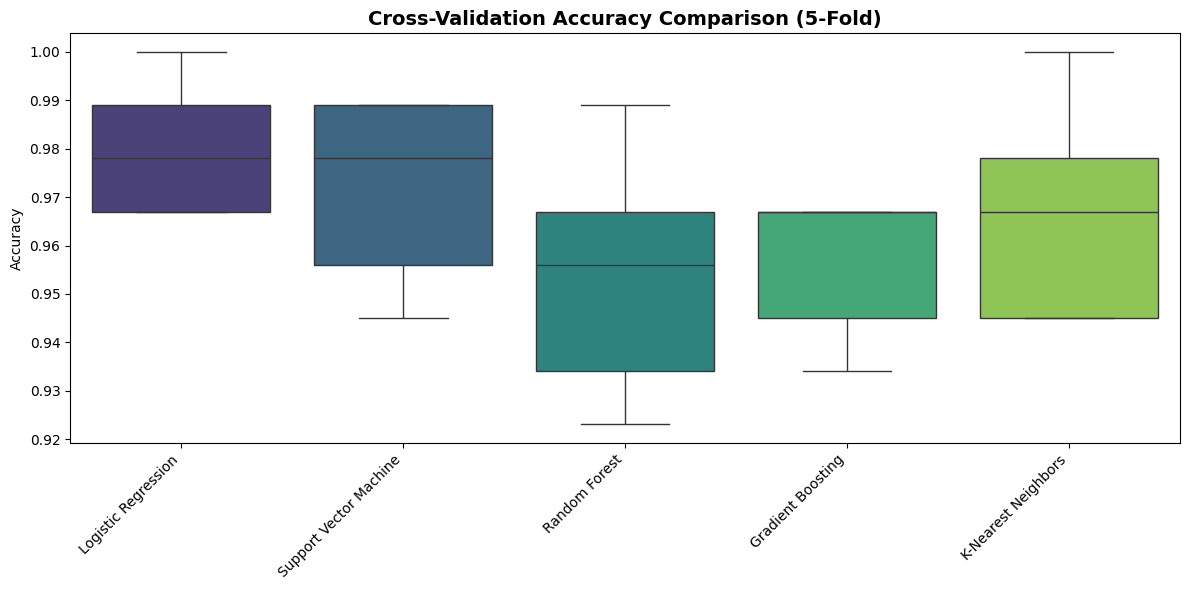

In [6]:
# --- Visualize Cross-Validation Results ---
plt.figure(figsize=(12, 6))
cv_df = pd.DataFrame(cv_results)
cv_df_melted = cv_df.melt(var_name='Model', value_name='Accuracy')

sns.boxplot(data=cv_df_melted, x='Model', y='Accuracy', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Cross-Validation Accuracy Comparison (5-Fold)', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [7]:
# --- Hyperparameter Tuning with GridSearchCV ---
print("=" * 60)
print("HYPERPARAMETER TUNING (GridSearchCV)")
print("=" * 60)

# Tune Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

print(f"\nRandom Forest Best Parameters:")
print(f"  {rf_grid.best_params_}")
print(f"  Best CV Score: {rf_grid.best_score_:.4f}")

# Tune SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)

print(f"\nSVM Best Parameters:")
print(f"  {svm_grid.best_params_}")
print(f"  Best CV Score: {svm_grid.best_score_:.4f}")

HYPERPARAMETER TUNING (GridSearchCV)



Random Forest Best Parameters:
  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
  Best CV Score: 0.9604

SVM Best Parameters:
  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
  Best CV Score: 0.9802


In [8]:
# --- Train Final Models and Evaluate ---
print("=" * 60)
print("FINAL MODEL EVALUATION ON TEST SET")
print("=" * 60)

final_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM (Tuned)': rf_grid.best_estimator_,
    'Random Forest (Tuned)': svm_grid.best_estimator_,
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = []
predictions = {}
probabilities = {}

for name, model in final_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    predictions[name] = y_pred
    probabilities[name] = y_prob
    results.append({'Model': name, 'Accuracy': acc, 'F1-Score': f1})
    
    print(f"\n{name}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1-Score: {f1:.4f}")

results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
print("\n" + "=" * 60)
print("LEADERBOARD")
print("=" * 60)
print(results_df.to_string(index=False))

FINAL MODEL EVALUATION ON TEST SET

Logistic Regression:
  Accuracy: 0.9825
  F1-Score: 0.9861



SVM (Tuned):
  Accuracy: 0.9561
  F1-Score: 0.9655

Random Forest (Tuned):
  Accuracy: 0.9825
  F1-Score: 0.9861



Gradient Boosting:
  Accuracy: 0.9561
  F1-Score: 0.9660

KNN:
  Accuracy: 0.9561
  F1-Score: 0.9655

LEADERBOARD
                Model  Accuracy  F1-Score
  Logistic Regression  0.982456  0.986111
Random Forest (Tuned)  0.982456  0.986111
          SVM (Tuned)  0.956140  0.965517
    Gradient Boosting  0.956140  0.965986
                  KNN  0.956140  0.965517


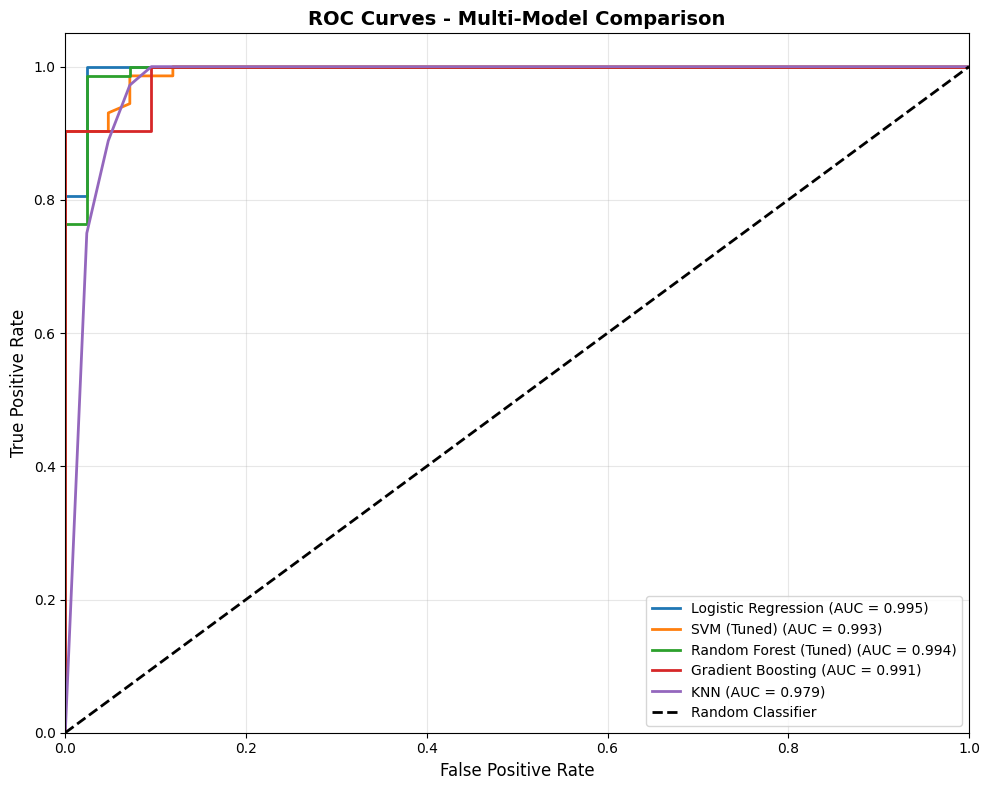

In [9]:
# --- ROC Curves Comparison ---
plt.figure(figsize=(10, 8))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for (name, y_prob), color in zip(probabilities.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Multi-Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

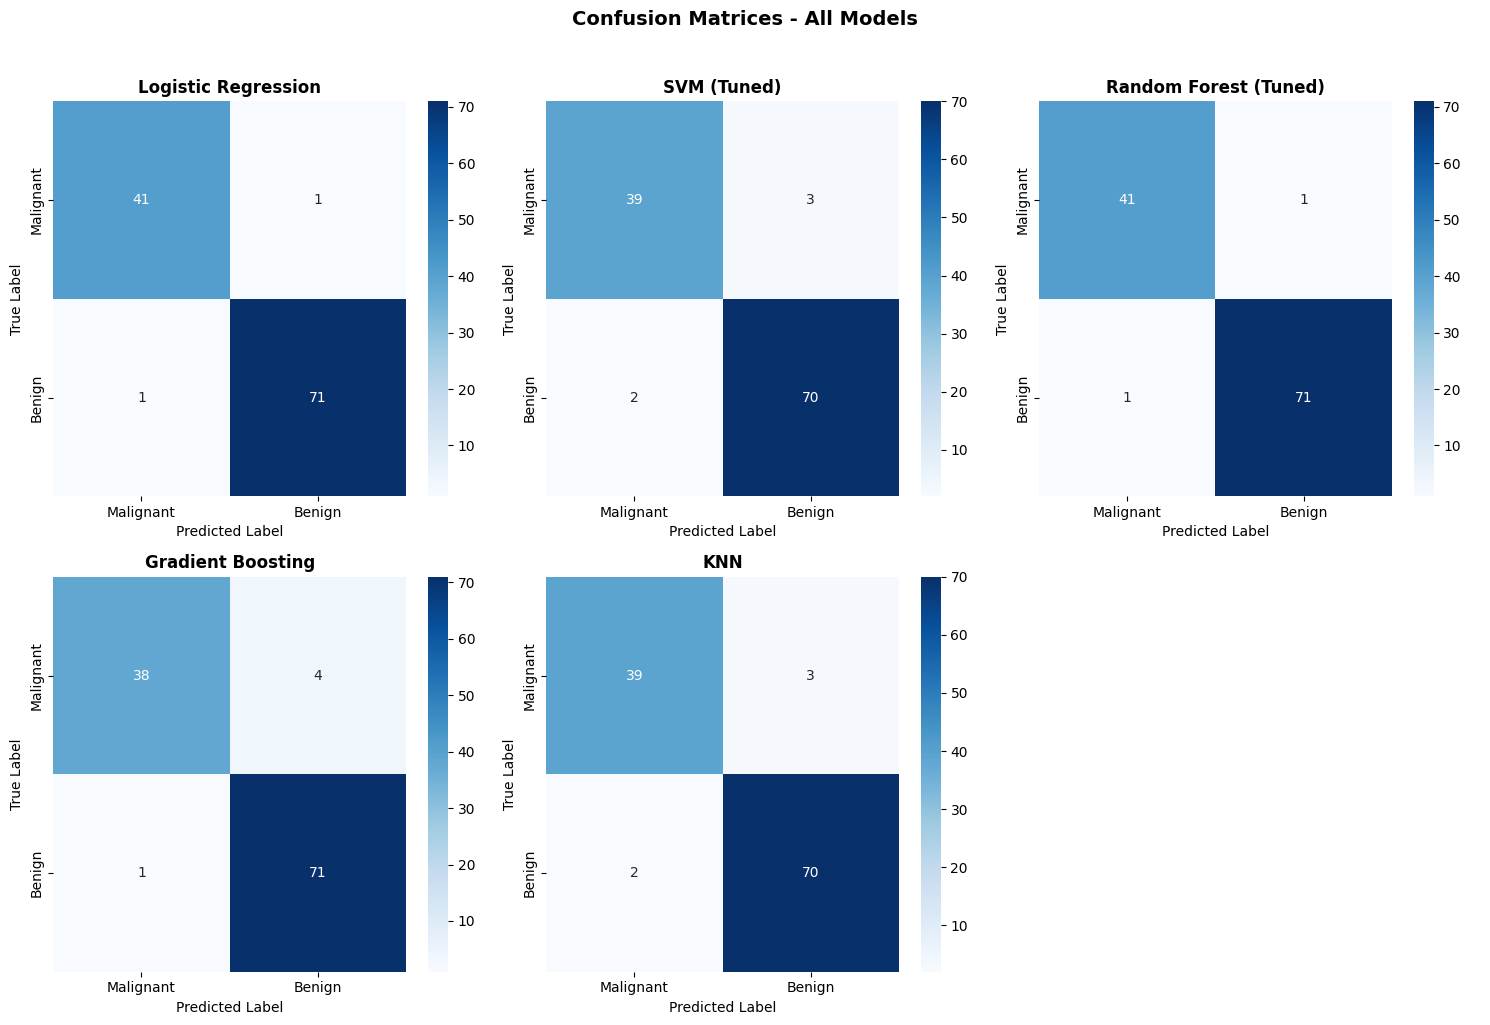

In [10]:
# --- Confusion Matrices Grid ---
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
    axes[idx].set_title(f'{name}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

axes[-1].axis('off')  # Hide empty subplot
plt.suptitle('Confusion Matrices - All Models', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

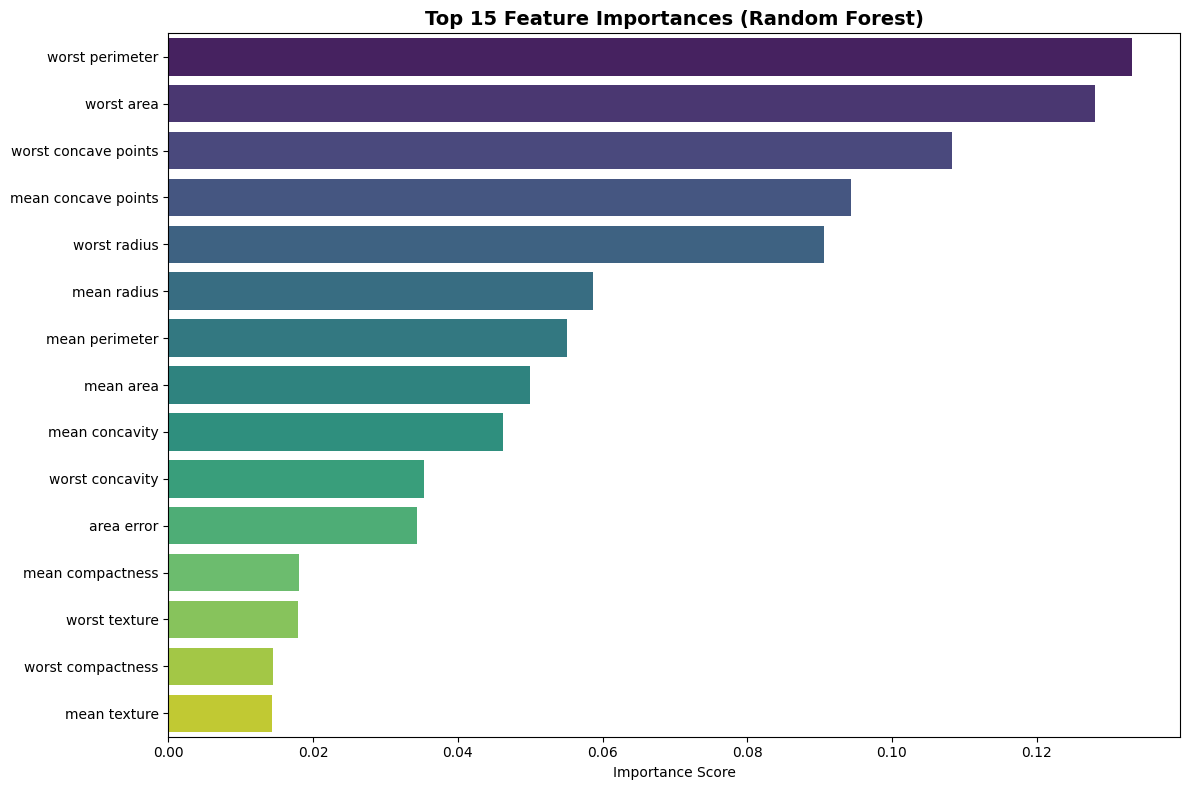


Top 5 Most Important Features:
  worst perimeter: 0.1331
  worst area: 0.1281
  worst concave points: 0.1083
  mean concave points: 0.0943
  worst radius: 0.0906


In [11]:
# --- Feature Importance (Random Forest) ---
rf_best = rf_grid.best_estimator_
rf_best.fit(X_train_scaled, y_train)
feature_importance = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': rf_best.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
for i, row in feature_importance.head(5).iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f}")

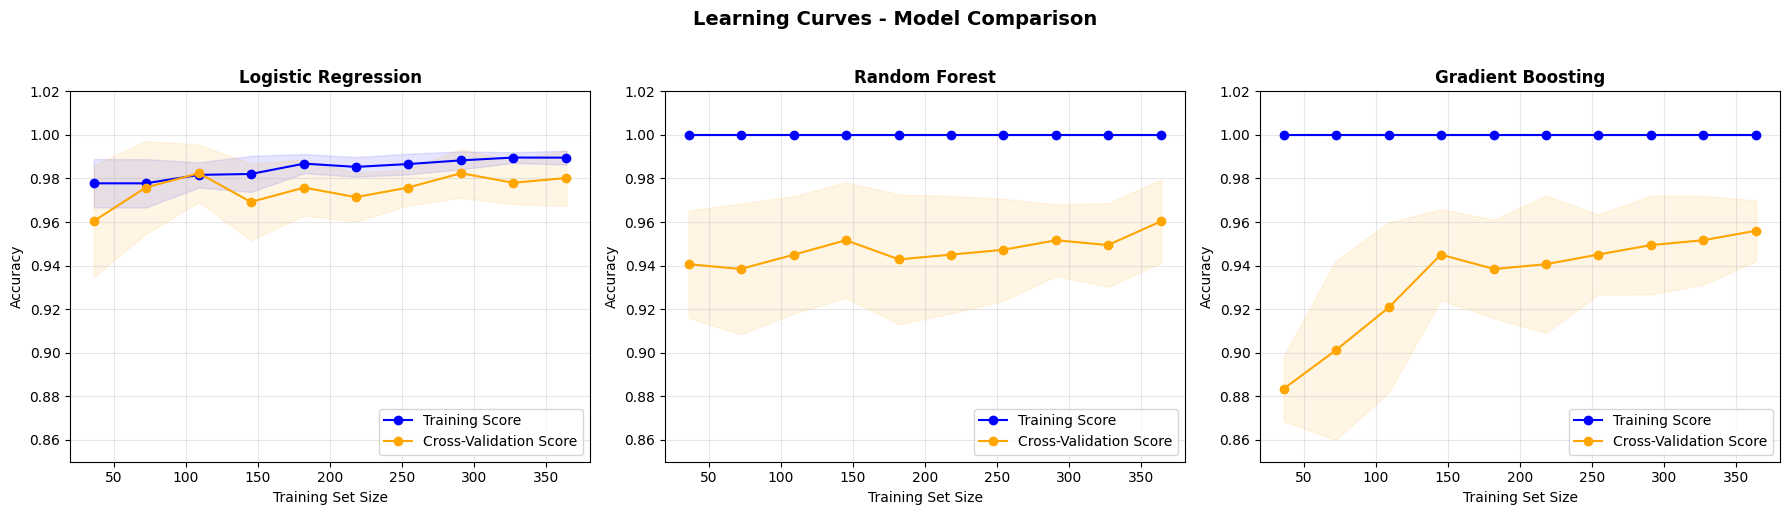

In [12]:
# --- Learning Curves ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_for_lc = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Random Forest', rf_grid.best_estimator_),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

for ax, (name, model) in zip(axes, models_for_lc):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_scaled, y_train, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )
    
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_mean = test_scores.mean(axis=1)
    test_std = test_scores.std(axis=1)
    
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
    ax.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    ax.plot(train_sizes, test_mean, 'o-', color='orange', label='Cross-Validation Score')
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'{name}', fontsize=12, fontweight='bold')
    ax.legend(loc='lower right')
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0.85, 1.02])

plt.suptitle('Learning Curves - Model Comparison', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [13]:
# --- Ensemble Voting Classifier ---
print("=" * 60)
print("ENSEMBLE VOTING CLASSIFIER")
print("=" * 60)

ensemble = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('rf', rf_grid.best_estimator_),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ],
    voting='soft'
)

ensemble.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble.predict(X_test_scaled)
y_prob_ensemble = ensemble.predict_proba(X_test_scaled)[:, 1]

ensemble_acc = accuracy_score(y_test, y_pred_ensemble)
ensemble_f1 = f1_score(y_test, y_pred_ensemble)
fpr_ens, tpr_ens, _ = roc_curve(y_test, y_prob_ensemble)
ensemble_auc = auc(fpr_ens, tpr_ens)

print(f"\nEnsemble Results:")
print(f"  Accuracy: {ensemble_acc:.4f}")
print(f"  F1-Score: {ensemble_f1:.4f}")
print(f"  AUC-ROC:  {ensemble_auc:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble, target_names=['Malignant', 'Benign']))

ENSEMBLE VOTING CLASSIFIER



Ensemble Results:
  Accuracy: 0.9561
  F1-Score: 0.9660
  AUC-ROC:  0.9950

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.97      0.90      0.94        42
      Benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



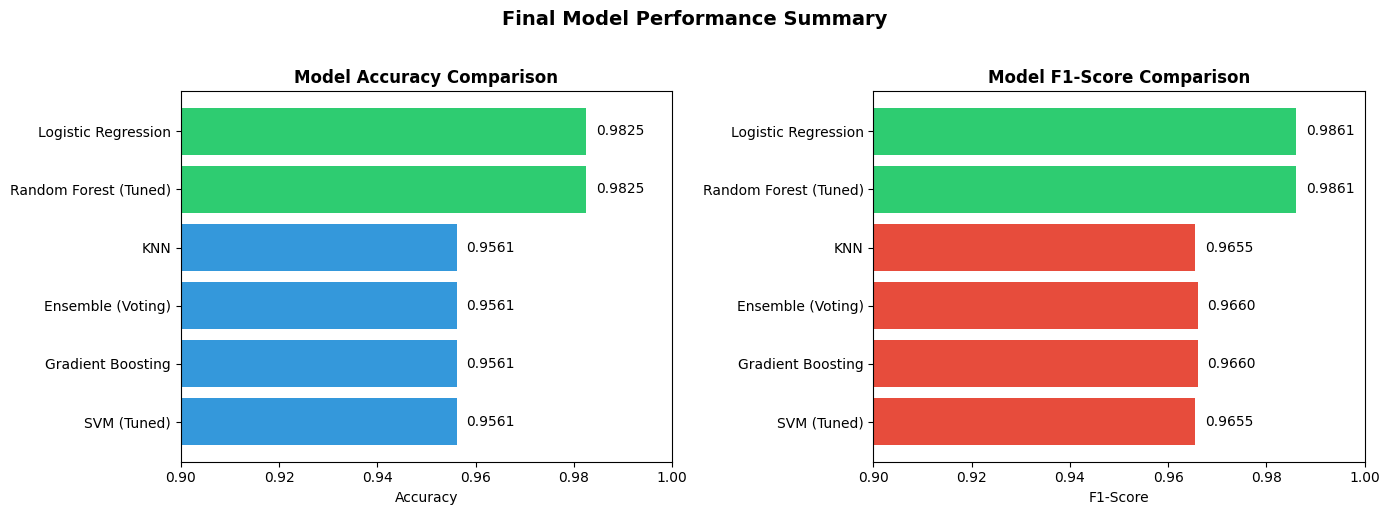


EXPERIMENT COMPLETE

Best Model: Logistic Regression
  Accuracy: 0.9825
  F1-Score: 0.9861


In [14]:
# --- Final Summary Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Add ensemble to results
all_results = results + [{'Model': 'Ensemble (Voting)', 'Accuracy': ensemble_acc, 'F1-Score': ensemble_f1}]
all_results_df = pd.DataFrame(all_results).sort_values('Accuracy', ascending=True)

# Accuracy comparison
colors = ['#2ecc71' if x == all_results_df['Accuracy'].max() else '#3498db' for x in all_results_df['Accuracy']]
axes[0].barh(all_results_df['Model'], all_results_df['Accuracy'], color=colors)
axes[0].set_xlabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0].set_xlim([0.9, 1.0])
for i, (acc, model) in enumerate(zip(all_results_df['Accuracy'], all_results_df['Model'])):
    axes[0].text(acc + 0.002, i, f'{acc:.4f}', va='center', fontsize=10)

# F1-Score comparison
colors = ['#2ecc71' if x == all_results_df['F1-Score'].max() else '#e74c3c' for x in all_results_df['F1-Score']]
axes[1].barh(all_results_df['Model'], all_results_df['F1-Score'], color=colors)
axes[1].set_xlabel('F1-Score')
axes[1].set_title('Model F1-Score Comparison', fontsize=12, fontweight='bold')
axes[1].set_xlim([0.9, 1.0])
for i, (f1, model) in enumerate(zip(all_results_df['F1-Score'], all_results_df['Model'])):
    axes[1].text(f1 + 0.002, i, f'{f1:.4f}', va='center', fontsize=10)

plt.suptitle('Final Model Performance Summary', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("EXPERIMENT COMPLETE")
print("=" * 60)
best_model = all_results_df.iloc[-1]
print(f"\nBest Model: {best_model['Model']}")
print(f"  Accuracy: {best_model['Accuracy']:.4f}")
print(f"  F1-Score: {best_model['F1-Score']:.4f}")

# **Conclusion**

This advanced experiment demonstrates a **complete production-level ML pipeline** for classification tasks.

**Key Techniques Applied:**
- **Multi-Model Comparison**: Evaluated 5 different algorithms (Logistic Regression, SVM, Random Forest, Gradient Boosting, KNN)
- **Cross-Validation**: Used 5-fold CV to ensure robust performance estimates
- **Hyperparameter Tuning**: Applied GridSearchCV to optimize Random Forest and SVM
- **Advanced Metrics**: Analyzed Accuracy, F1-Score, ROC-AUC, and Confusion Matrices
- **Feature Importance**: Identified most predictive features using Random Forest
- **Learning Curves**: Diagnosed bias-variance tradeoff across models
- **Ensemble Methods**: Combined top models using Voting Classifier for improved performance

**Key Insights:**
- Ensemble methods often outperform individual models by combining their strengths
- Hyperparameter tuning can significantly improve model performance
- Cross-validation provides more reliable performance estimates than single train-test splits
- Feature importance analysis helps understand what drives predictions

This pipeline forms the foundation for tackling real-world classification problems with **best ML practices**.